<a href="https://colab.research.google.com/github/trevinofernando/Algorithms-for-Machine-Learning/blob/master/HW1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration

In [826]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

##Data retrival

In [827]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']

dataframe = pd.read_csv(url, names = header)
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Randomize/Suffleing Dataset

In [828]:
#shuffle dataframe in place
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.5,2.3,4.0,1.3,Iris-versicolor
1,5.5,4.2,1.4,0.2,Iris-setosa
2,6.7,3.1,4.7,1.5,Iris-versicolor
3,6.3,2.9,5.6,1.8,Iris-virginica
4,5.9,3.0,5.1,1.8,Iris-virginica


##Counting classes in dataset

In [829]:
dataframe.iris_class.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris_class, dtype: int64

##Minmums and Maximums

###Sepal

In [830]:
print("Min sepal_length = {} in.".format(dataframe.sepal_length.min()))
print("Max sepal_length = {} in.".format(dataframe.sepal_length.max()))
print("Min sepal_width = {} in.".format(dataframe.sepal_width.min()))
print("Max sepal_width = {} in.".format(dataframe.sepal_width.max()))

Min sepal_length = 4.3 in.
Max sepal_length = 7.9 in.
Min sepal_width = 2.0 in.
Max sepal_width = 4.4 in.


###Petal

In [831]:
print("Min petal_length = {} in.".format(dataframe.petal_length.min()))
print("Max petal_length = {} in.".format(dataframe.petal_length.max()))
print("Min petal_width = {} in.".format(dataframe.petal_width.min()))
print("Max petal_width = {} in.".format(dataframe.petal_width.max()))

Min petal_length = 1.0 in.
Max petal_length = 6.9 in.
Min petal_width = 0.1 in.
Max petal_width = 2.5 in.


##Scatterplots

###Setup

In [832]:
data = dataframe.iloc[:, :-1].values
labels = dataframe.iloc[:, -1].values

print("Shape of data: ") 
print(data.shape)
print("Shape of laebls: ")
print(labels.shape)

Shape of data: 
(150, 4)
Shape of laebls: 
(150,)


In [833]:
# Function to map the colors as a list from the labels
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Iris-virginica':
            cols.append('red')
        elif l=='Iris-versicolor':
            cols.append('blue')
        elif l=='Iris-setosa':
            cols.append('green')
        else: #unlabeled data
            cols.append('black')
    return cols
# Create the colors list using the function above
cols=pltcolor(labels)

# Labels to use for each class
group = labels
classdict = {"Iris-virginica": 'red', "Iris-versicolor": 'blue', "Iris-setosa": 'green'}

###Sepal Length vs Sepal Width

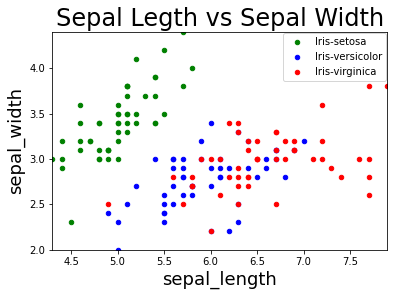

It doesn't appear to be a linear relationship between Sepal Length vs Sepal Width


In [834]:
fig, ax = plt.subplots()

#Plot each class at a time just so we can colored legend
for g in np.unique(group):
    indexesOfGroup = np.where(group == g)
    ax.scatter(data[indexesOfGroup, 0], data[indexesOfGroup, 1], c = classdict[g], label = g, s = 20)

ax.legend( loc="upper right",      # Position of the legend
           borderaxespad=0.1)      # Add little spacing around the legend box

#plt.scatter(x=data[:,0], y=data[:,1], c=cols)
plt.title("Sepal Legth vs Sepal Width",fontsize=24)
plt.xlabel(header[0], fontsize=18)
plt.ylabel(header[1], rotation=90, fontsize=18)
plt.axis([dataframe.sepal_length.min(), dataframe.sepal_length.max(), dataframe.sepal_width.min(), dataframe.sepal_width.max()])
plt.show()
print("It doesn't appear to be a linear relationship between Sepal Length vs Sepal Width")

###Petal Length vs Petal Width

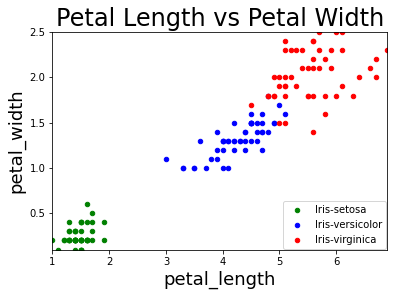

It's easy to see the Petal Length vs Petal Width follow an increasing linear trend


In [818]:
fig, ax = plt.subplots()

#Plot each class at a time just so we can color the legend
for g in np.unique(group):
    indexesOfGroup = np.where(group == g)
    ax.scatter(data[indexesOfGroup, 2], data[indexesOfGroup, 3], c = classdict[g], label = g, s = 20)

ax.legend( loc="lower right",      # Position of the legend
           borderaxespad=0.1)      # Add little spacing around the legend box

#plt.scatter(x=data[:,2], y=data[:,3], c=cols)
plt.title("Petal Length vs Petal Width",fontsize=24)
plt.xlabel(header[2], fontsize=18)
plt.ylabel(header[3], rotation=90, fontsize=18)
plt.axis([dataframe.petal_length.min(), dataframe.petal_length.max(), dataframe.petal_width.min(), dataframe.petal_width.max()])
plt.show()
print("It's easy to see the Petal Length vs Petal Width follow an increasing linear trend")

#Linear Regresion

In [819]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

##Sepal

In [820]:
x_train, x_test, y_train, y_test = train_test_split(data[ : , 0], data[ : , 1], test_size = 0.2)

model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)

predictions = model.predict(x_test.reshape(-1,1))

print(r2_score(y_test, predictions))
print("An r^2 value this low means that there is no linear relationship between the Sepal Lenght and Sepal Width")

-0.12417260417127896
An r^2 value this low means that there is no linear relationship between the Sepal Lenght and Sepal Width


##Petal

In [821]:
x_train, x_test, y_train, y_test = train_test_split(data[ : , 2], data[ : , 3], test_size = 0.2)

model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)

predictions = model.predict(x_test.reshape(-1,1))

print(r2_score(y_test, predictions))
print("An r^2 value this high means that there is a strong linear relationship between the Petal Lenght and Petal Width")

0.9386785103075064
An r^2 value this high means that there is a strong linear relationship between the Petal Lenght and Petal Width


##Sepal and Petal (Logistic)

In [822]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.85      0.85      0.85        13

       accuracy                           0.87        30
      macro avg       0.89      0.89      0.89        30
   weighted avg       0.87      0.87      0.87        30



#K-Nearest Neighbor

##Data Extraction

In [823]:
#TODO k-d tree

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
dataframe = pd.read_csv(url, names = header)

#shuffle dataframe in place
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

data = dataframe.iloc[:, :-1].values
labels = dataframe.iloc[:, -1].values

##Euclidean Distance

In [824]:
def distance(a, b):
  #Square root of the sum along the rows of the Square of the difference between a and b... magic, no touch!
  #b needs to have the same row shape as a and b needs to be a vector
  return np.sqrt(np.sum(np.multiply(np.subtract(a,b),np.subtract(a,b)), axis=1))

##Partition of Data for Five Fold Cross Validation

In [825]:
#partition in range(1, 6)
def Get_Train_N_Test_Data(x_array, y_array, partition):
  part_size = int(y_array.size / 5)
  #initialize empty feature vectors

  xtest = x_array[part_size*(partition-1) : part_size*partition , : ]
  ytest = y_array[ part_size*(partition-1) : part_size*partition ]
  
  if partition == 1:
    xtrain = x_array[part_size*partition : , : ] #grab all skiping first partition
    ytrain = y_array[part_size*partition : ] #grab all skiping first partition
  else:
    xtrain = x_array[ : part_size*(partition-1) , : ] #grab all until training starts
    ytrain = y_array[ : part_size*(partition-1)] #grab all until training starts
    xtrain = np.append(xtrain, x_array[part_size*(partition) : , : ], axis = 0) #grab all after training ends
    ytrain = np.append(ytrain, y_array[part_size*(partition) : ]) #grab all after training ends

  return xtrain, xtest, ytrain, ytest

##KNN Algorithm

In [835]:
#returns accuarcy on prediction of test data with train data
def Find_Nearest_Neightbor(this_x_train, this_x_test, this_y_train, this_y_test, K):
    accuarcy = 0.0
    count = 0.0

    #Get vector dimensions
    rows_train, cols = this_x_train.shape
    rows_test = this_y_test.size
    
    for i in range(rows_test):
      dist_train = distance(this_x_train, this_x_test[i,:]) #calcualte distance for each test row along all train points
      indexes = np.argpartition(dist_train, K) #Get indexes of the K Nearest Neightbors
      correctNeightbors = np.count_nonzero(this_y_test[i] == this_y_train[indexes[:K]]) #Count number of correct neightbors
      if correctNeightbors * 2 > K: #more than half of the neightbors are of the correct label
        count += 1.0
    accuarcy = count / rows_test
    return accuarcy

In [836]:
#For each
ks = [1,3,5,7]
accuarcies = np.array([0.0,0.0,0.0,0.0])

for i in range(1,6):
  x_train, x_test, y_train, y_test = Get_Train_N_Test_Data(data, labels, i)
  for j in range(4):
    accuarcies[j] += Find_Nearest_Neightbor(x_train, x_test, y_train, y_test, ks[j])
accuarcies = np.divide(accuarcies, 5.0)

for i in range(4):
  print("Accuarcy of {} Nearest Neightbors: {}".format(ks[i], accuarcies[i]))


Accuarcy of 1 Nearest Neightbors: 0.96
Accuarcy of 3 Nearest Neightbors: 0.96
Accuarcy of 5 Nearest Neightbors: 0.9666666666666666
Accuarcy of 7 Nearest Neightbors: 0.9733333333333334
